In [ ]:
import numpy as np # operaciones matemáticas (numerical python)
import pandas as pd # manipulación de datos
import warnings # nobody likes warnings

# 📊 Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
warnings.filterwarnings('ignore') # ignore warnings

In [8]:
wine = pd.read_csv("winequality-red.csv")

In [9]:
def snake_columns(data): 
    """
    returns the columns in snake case
    """
    data.columns = [column.lower().replace(' ', '_') for column in data.columns]

In [10]:
snake_columns(wine)

In [11]:
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [12]:
wine.shape

(1599, 12)

In [13]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   ph                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [14]:
# General Selection
# Separa en un dataframe llamado num las numericas y en un dataframe llamado "cat" las categoricas

num = wine.drop('quality', axis=1)
cat = cat = wine[['quality']]

In [15]:
num.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [16]:
num.nunique()

fixed_acidity            96
volatile_acidity        143
citric_acid              80
residual_sugar           91
chlorides               153
free_sulfur_dioxide      60
total_sulfur_dioxide    144
density                 436
ph                       89
sulphates                96
alcohol                  65
dtype: int64

In [17]:
num.citric_acid.value_counts()

citric_acid
0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: count, Length: 80, dtype: int64

<h1 style="color: #00BFFF;">02 | Data cleaning</h1>

In [18]:
def explore_data(data): # sum & returns duplicates, NaN & empty spaces
    duplicate_rows = data.duplicated().sum()
    nan_values = data.isna().sum()
    empty_spaces = data.eq(' ').sum()
    import pandas as pd
    exploration = pd.DataFrame({"NaN": nan_values, "EmptySpaces": empty_spaces}) # New dataframe with the results
    print(f"There are {data.duplicated().sum()} duplicate rows. Also;")
    return exploration

In [19]:
explore_data(wine)

There are 240 duplicate rows. Also;


,NaN,EmptySpaces
fixed_acidity,0,0
volatile_acidity,0,0
citric_acid,0,0
residual_sugar,0,0
chlorides,0,0
free_sulfur_dioxide,0,0
total_sulfur_dioxide,0,0
density,0,0
ph,0,0
sulphates,0,0


In [20]:
wine.nunique().sort_values(ascending=False)

density                 436
chlorides               153
total_sulfur_dioxide    144
volatile_acidity        143
fixed_acidity            96
sulphates                96
residual_sugar           91
ph                       89
citric_acid              80
alcohol                  65
free_sulfur_dioxide      60
quality                   6
dtype: int64

In [21]:
wine.eq(' ').sum().sort_values(ascending=False)

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
ph                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [22]:
wine.nunique()

fixed_acidity            96
volatile_acidity        143
citric_acid              80
residual_sugar           91
chlorides               153
free_sulfur_dioxide      60
total_sulfur_dioxide    144
density                 436
ph                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [23]:
wine.isnull().sum() / len(wine) * 100

fixed_acidity           0.0
volatile_acidity        0.0
citric_acid             0.0
residual_sugar          0.0
chlorides               0.0
free_sulfur_dioxide     0.0
total_sulfur_dioxide    0.0
density                 0.0
ph                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

<h2 style="color: #008080;">Categorical Variables</h2>

In [24]:
cat.quality.nunique()

6

In [25]:
cat.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [26]:
frequency_table = cat.quality.value_counts()
frequency_table

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [27]:
proportion_table = cat.quality.value_counts(normalize=True).round(2)
proportion_table

quality
5    0.43
6    0.40
7    0.12
4    0.03
8    0.01
3    0.01
Name: proportion, dtype: float64

In [28]:
# JUNTA LAS DOS: frecuencias absolutas con frecuencias relativas
df2 = pd.concat([frequency_table, proportion_table], axis=1)
df2

,count,proportion
quality,,
5,681,0.43
6,638,0.40
7,199,0.12
4,53,0.03
8,18,0.01
3,10,0.01


In [29]:
# Cambiale los nombres de las columnas
df2.columns = ['absolute_frequency', 'relative_frequency']
df2

,absolute_frequency,relative_frequency
quality,,
5,681,0.43
6,638,0.40
7,199,0.12
4,53,0.03
8,18,0.01
3,10,0.01


### Vamos a añadirle la fila de totales

In [30]:
total_absolute = frequency_table.sum()
print(total_absolute)
total_relative = proportion_table.sum()
print(total_relative)

1599
1.0


In [31]:
total_row = pd.DataFrame({
    'absolute_frequency': [total_absolute],
    'relative_frequency': [total_relative]
}, index=['Total'])
total_row

,absolute_frequency,relative_frequency
Total,1599,1.0


In [32]:
df3 = pd.concat([df2,total_row])
df3

,absolute_frequency,relative_frequency
5,681,0.43
6,638,0.40
7,199,0.12
4,53,0.03
8,18,0.01
3,10,0.01
Total,1599,1.00


In [33]:
#Crosstab para resumir y organizar datos.

In [34]:
pd.crosstab(index=cat.quality,
           columns='count')

col_0,count
quality,
3,10
4,53
5,681
6,638
7,199
8,18


In [35]:
# El otro crosstab no lo puedo hacer, porque no puedo comparar más categorías. 5 entra en las malas, si estono esta tan desbalanceado como pensaba no tendré que hacer smote 

In [36]:
# Aunque en este caso parezca como un sort_values, realmente crosstab agrupa y cuenta a la vez. sort_values simplemente reordena. 

<h1 style="color: #00BFFF;">Visualizations</h1>

In [37]:
df2 = df2.reset_index()
df2

,quality,absolute_frequency,relative_frequency
0,5,681,0.43
1,6,638,0.40
2,7,199,0.12
3,4,53,0.03
4,8,18,0.01
5,3,10,0.01


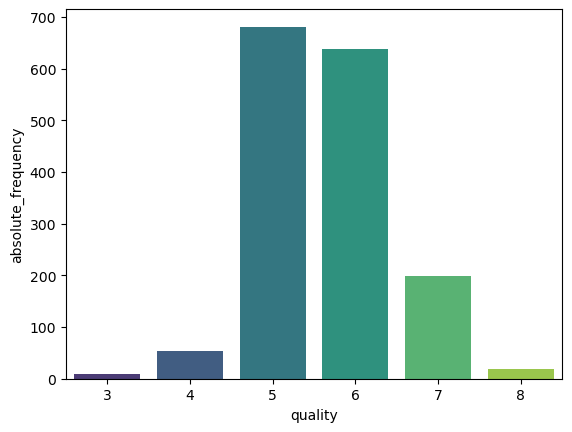

In [38]:
sns.barplot(
    x='quality',
    y='absolute_frequency',
    data=df2,
    palette='viridis',
)
plt.show()

In [39]:
df2

,quality,absolute_frequency,relative_frequency
0,5,681,0.43
1,6,638,0.40
2,7,199,0.12
3,4,53,0.03
4,8,18,0.01
5,3,10,0.01


##### Pie charts

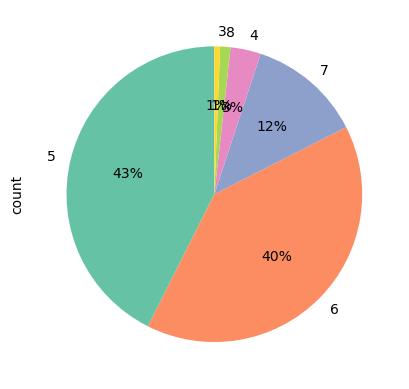

In [40]:
frequency_table.plot.pie(autopct='%1.0f%%' ,startangle=90, colors=sns.color_palette('Set2'))
plt.show()

<h2 style="color: #008080;">Numerical Variables</h2>

In [41]:
num.describe().T.round(0)

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,1599.0,8.0,2.0,5.0,7.0,8.0,9.0,16.0
volatile_acidity,1599.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0
citric_acid,1599.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
residual_sugar,1599.0,3.0,1.0,1.0,2.0,2.0,3.0,16.0
chlorides,1599.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
free_sulfur_dioxide,1599.0,16.0,10.0,1.0,7.0,14.0,21.0,72.0
total_sulfur_dioxide,1599.0,46.0,33.0,6.0,22.0,38.0,62.0,289.0
density,1599.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
ph,1599.0,3.0,0.0,3.0,3.0,3.0,3.0,4.0
sulphates,1599.0,1.0,0.0,0.0,1.0,1.0,1.0,2.0


#count: Todas las variables tienen 1599 datos, lo que indica que no hay valores nulos o faltantes en estas columna
#mean: fixed_acidity: promedio de 8.0 la mayoria de de los vinos tienen acidez fija cercana a 8. y en alcohol, que el promedio es de 10, indica que la mayoria de los vinos tienen un 10% de alcolhol.
#std: total_sulfur_dioxide: Tiene una desviación estándar de 33, lo que indica una gran variabilidad en los valores.
mientras que ph: Tiene una desviación estándar de 0.0, lo que muestra que los valores están muy agrupados en torno a 3.0.
#residual_sugar: El mínimo es 1. Esto indica que algunos vinos tienen muy poco azúcar residual.
#ph: Mínimo de 3. Esto confirma que la acidez (ph) no cae por debajo de este valor.
#El 50% de los vinos tienen menos de 14 mg/L de dióxido de azufre libre.
El 75% tienen menos de 21 mg/L.
alcohol:
La mediana está en 10.0%, y el 75% de los vinos tienen menos de 11.0%.
max: total_sulfur_dioxide: 289 mg/L, un valor mucho mayor que el percentil 75 (62). Esto sugiere la posible presencia de valores atípicos.
residual_sugar: 16 g/L, mucho mayor que el percentil 75 (3), indicando posibles valores extremos.

 Trataremos Valores atípicos junto con outliers

**Measures of Centrality**

In [42]:
print(num.fixed_acidity.mean().round(0))
print(num.fixed_acidity.median())
print(num.fixed_acidity.mode())

8.0
7.9
0    7.2
Name: fixed_acidity, dtype: float64


In [43]:
print(num.volatile_acidity.mean().round(0))
print(num.volatile_acidity.median())
print(num.volatile_acidity.mode())

1.0
0.52
0    0.6
Name: volatile_acidity, dtype: float64


In [44]:
print(num.citric_acid.mean().round(0))
print(num.citric_acid.median())
print(num.citric_acid.mode())

0.0
0.26
0    0.0
Name: citric_acid, dtype: float64


In [45]:
print(num.residual_sugar.mean().round(0))
print(num.residual_sugar.median())
print(num.residual_sugar.mode())

3.0
2.2
0    2.0
Name: residual_sugar, dtype: float64


In [46]:
print(num.chlorides.mean().round(0))
print(num.chlorides.median())
print(num.chlorides.mode())

0.0
0.079
0    0.08
Name: chlorides, dtype: float64


In [47]:
print(num.free_sulfur_dioxide.mean().round(0))
print(num.free_sulfur_dioxide.median())
print(num.free_sulfur_dioxide.mode())

16.0
14.0
0    6.0
Name: free_sulfur_dioxide, dtype: float64


In [48]:
print(num.total_sulfur_dioxide.mean().round(0))
print(num.total_sulfur_dioxide.median())
print(num.total_sulfur_dioxide.mode())

46.0
38.0
0    28.0
Name: total_sulfur_dioxide, dtype: float64


In [49]:
print(num.density.mean().round(0))
print(num.density.median())
print(num.density.mode())

1.0
0.99675
0    0.9972
Name: density, dtype: float64


In [50]:
print(num.ph.mean().round(0))
print(num.ph.median())
print(num.ph.mode())

3.0
3.31
0    3.3
Name: ph, dtype: float64


In [51]:
print(num.sulphates.mean().round(0))
print(num.sulphates.median())
print(num.sulphates.mode())

1.0
0.62
0    0.6
Name: sulphates, dtype: float64


In [52]:
print(num.alcohol.mean().round(0))
print(num.alcohol.median())
print(num.alcohol.mode())

10.0
10.2
0    9.5
Name: alcohol, dtype: float64


**Measures of Dispersion**

In [53]:
# quantiles ([])

num.fixed_acidity.quantile([0.3]).reset_index()

,index,fixed_acidity
0,0.3,7.2


In [54]:

num.volatile_acidity.quantile([0.3]).reset_index()

,index,volatile_acidity
0,0.3,0.415


In [55]:

num.citric_acid.quantile([0.3]).reset_index()

,index,citric_acid
0,0.3,0.124


In [56]:

num.residual_sugar.quantile([0.3]).reset_index()

,index,residual_sugar
0,0.3,2.0


In [57]:

num.chlorides.quantile([0.3]).reset_index()

,index,chlorides
0,0.3,0.072


In [58]:

num.free_sulfur_dioxide.quantile([0.3]).reset_index()

,index,free_sulfur_dioxide
0,0.3,9.0


In [59]:

num.total_sulfur_dioxide.quantile([0.3]).reset_index()

,index,total_sulfur_dioxide
0,0.3,24.0


In [60]:

num.density.quantile([0.3]).reset_index()

,index,density
0,0.3,0.99586


In [61]:

num.ph.quantile([0.3]).reset_index()

,index,ph
0,0.3,3.23


In [62]:

num.sulphates.quantile([0.3]).reset_index()

,index,sulphates
0,0.3,0.564


In [63]:

num.alcohol.quantile([0.3]).reset_index()

,index,alcohol
0,0.3,9.6


#### Shape of the Distribution

Skewness and kurtosis provide insights into the shape of the data distribution. Skewness indicates the asymmetry, and kurtosis tells about the "tailedness" or how peaked the distribution is.

In [64]:
# skewness --> skew()

num.fixed_acidity.skew().round(2)

0.98

In [65]:
# skewness --> skew()

num.volatile_acidity.skew().round(2)

0.67

In [66]:
# skewness --> skew()

num.citric_acid.skew().round(2)

0.32

In [67]:
# skewness --> skew()

num.residual_sugar.skew().round(2)

4.54

In [68]:
# skewness --> skew()

num.chlorides.skew().round(2)

5.68

In [69]:
# skewness --> skew()

num.free_sulfur_dioxide.skew().round(2)

1.25

In [70]:
# skewness --> skew()

num.total_sulfur_dioxide.skew().round(2)

1.52

In [71]:
# skewness --> skew()

num.density.skew().round(2)

0.07

In [72]:
# skewness --> skew()

num.ph.skew().round(2)

0.19

In [73]:
# skewness --> skew()

num.sulphates.skew().round(2)

2.43

In [74]:
# skewness --> skew()

num.alcohol.skew().round(2)

0.86

In [75]:
# kurtosis --> kurtosis()

num.fixed_acidity.kurtosis().round(2)

1.13

In [76]:
# kurtosis --> kurtosis()

num.volatile_acidity.kurtosis().round(2)

1.23

In [77]:
# kurtosis --> kurtosis()

num.citric_acid.kurtosis().round(2)

-0.79

In [78]:
# kurtosis --> kurtosis()

num.residual_sugar.kurtosis().round(2)

28.62

In [79]:
# kurtosis --> kurtosis()

num.chlorides.kurtosis().round(2)

41.72

In [80]:
# kurtosis --> kurtosis()

num.free_sulfur_dioxide.kurtosis().round(2)

2.02

In [81]:
# kurtosis --> kurtosis()

num.total_sulfur_dioxide.kurtosis().round(2)

3.81

In [82]:
# kurtosis --> kurtosis()
num.density.kurtosis().round(2)

0.93

In [83]:
# kurtosis --> kurtosis()

num.ph.kurtosis().round(2)

0.81

In [84]:
num.sulphates.kurtosis().round(2)

11.72

In [85]:
num.alcohol.kurtosis().round(2)

0.2

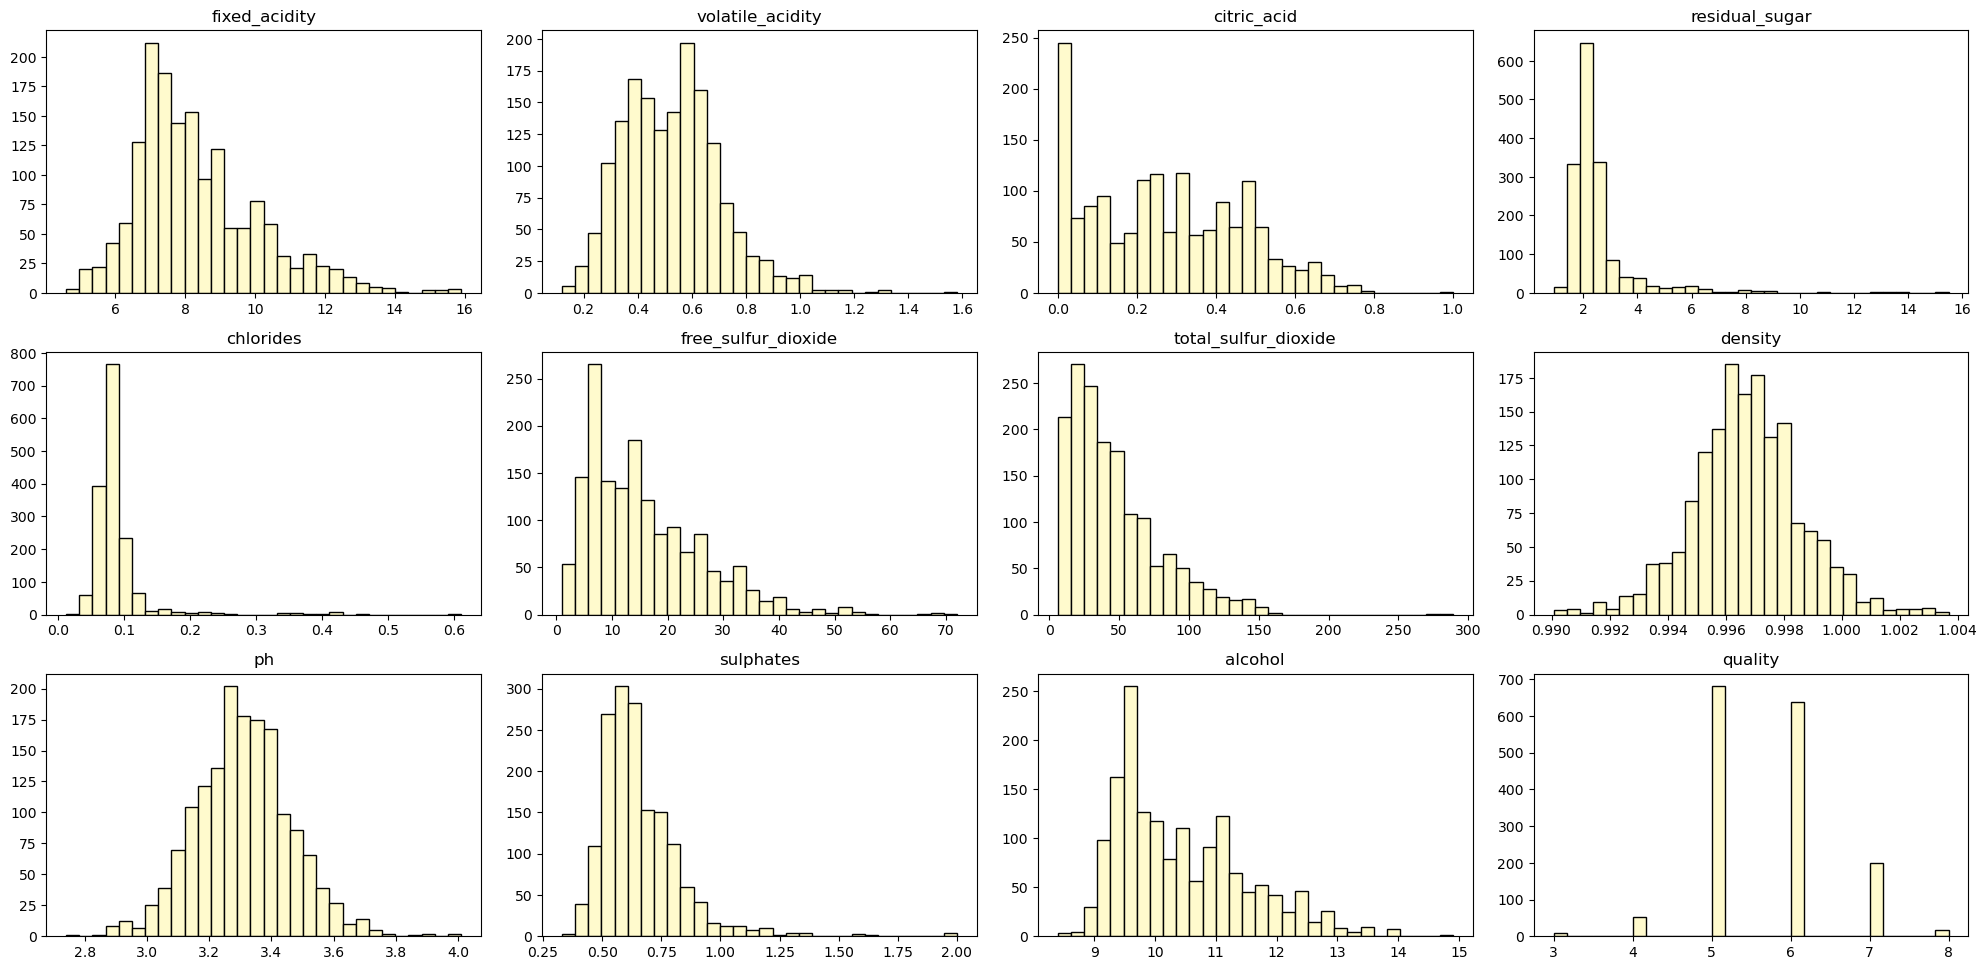

In [ ]:
color = '#800000'

nrows, ncols = 5, 4

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(wine.columns):
        ax.set_visible(False)  
        continue
    ax.hist(wine.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(wine.columns[i])

plt.tight_layout()
plt.show()

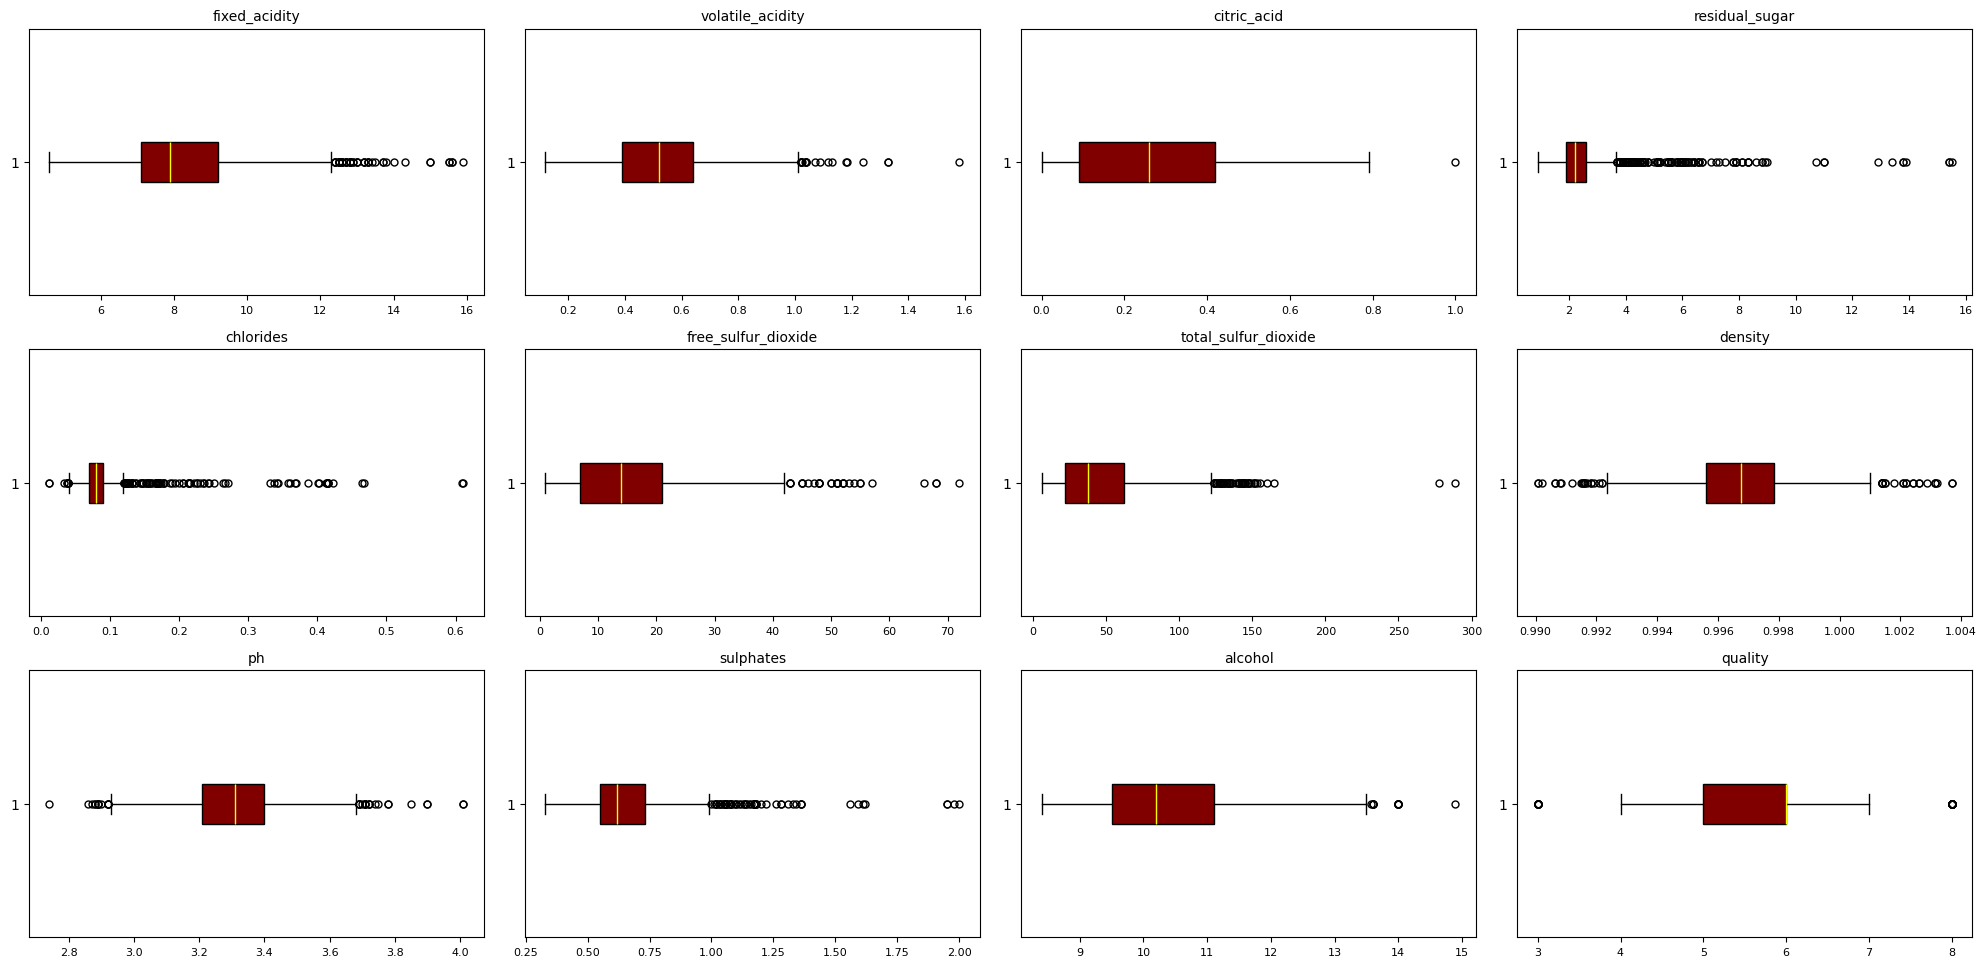

In [87]:
color = '#800000'


nrows, ncols = 5, 4 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(wine.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(wine.iloc[:, i].dropna(), vert=False, patch_artist=True, 
               boxprops=dict(facecolor=color, color='black'), 
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'), 
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(wine.columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()

In [88]:
#DISCRETIZAR: 
# Pérdida de Información: La discretización simplifica la variable, lo que significa que puedes perder detalles importantes.

In [89]:
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [90]:
wine2 = wine.copy()

In [91]:
wine2.to_csv('wine2.ipynb', index=False)

### Análisis adicional de outliers

In [94]:
print(num.info())
print(num.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   ph                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
dtypes: float64(11)
memory usage: 137.5 KB
None
   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8          

 Interpretación de los porcentajes
Porcentajes muy bajos (<1%):

Variables como citric_acid (0.06%) y alcohol (0.81%) tienen muy pocos outliers.
Es poco probable que estos valores afecten significativamente tu análisis. Probablemente puedas ignorarlos, a menos que sean críticos para tu modelo.
Porcentajes moderados (1-5%):

Variables como volatile_acidity (1.19%), free_sulfur_dioxide (1.88%), y density (2.81%) están en un rango aceptable.
Aunque no son despreciables, suelen ser manejables sin necesidad de aplicar transformaciones agresivas.
Porcentajes altos (>5%):

Variables como residual_sugar (9.69%) y chlorides (7.00%) tienen una cantidad considerable de valores atípicos.
Esto puede indicar la presencia de una cola larga en la distribución o un sesgo significativo.
Para estas variables, deberías considerar tratar los outliers (por ejemplo, recortar valores extremos, transformaciones logarítmicas, etc.).

### Quitamos outliers  

In [ ]:
def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5* IQR
    
    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    return outliers

In [110]:
wine2.citric_acid.value_counts(ascending= True)

citric_acid
0.78      1
0.62      1
0.79      1
0.71      1
1.00      1
       ... 
0.26     38
0.02     50
0.24     51
0.49     68
0.00    132
Name: count, Length: 80, dtype: int64

In [112]:
index_outlier_citric=wine2[wine2["citric_acid"] == 1.00].index
index_outlier_citric

Index([151], dtype='int64')

In [113]:
wine2=wine2.drop(index_outlier_citric)

In [117]:
len(wine2)

1598

In [123]:
index_outlier_volatile=wine2[wine2["volatile_acidity"] == 1.580].index
index_outlier_volatile

Index([1299], dtype='int64')

In [124]:
wine2=wine2.drop(index_outlier_volatile)

In [125]:
len(wine2)

1597

In [122]:
tukeys_test_outliers(wine2['volatile_acidity'])

38      1.130
94      1.020
120     1.070
126     1.330
127     1.330
134     1.040
199     1.090
553     1.040
672     1.240
690     1.185
700     1.020
705     1.035
710     1.025
724     1.115
899     1.020
1261    1.020
1299    1.580
1312    1.180
1467    1.040
Name: volatile_acidity, dtype: float64

In [130]:
index_outlier_chlorides=wine2[wine2["chlorides"] > 0.6].index
index_outlier_chlorides

Index([258], dtype='int64')

In [131]:
wine2=wine2.drop(index_outlier_chlorides)

In [132]:
len(wine2)

1596

In [134]:
index_outlier_free=wine2[wine2["free_sulfur_dioxide"] > 60].index
index_outlier_free

Index([396, 400, 1244, 1558], dtype='int64')

In [135]:
wine2=wine2.drop(index_outlier_free)

In [136]:
len(wine2)

1592

In [138]:
index_outlier_total=wine2[wine2["total_sulfur_dioxide"] > 250].index
index_outlier_total

Index([1079, 1081], dtype='int64')

In [139]:
wine2=wine2.drop(index_outlier_total)

In [140]:
len(wine2)

1590

In [141]:
wine3 = wine2.copy()

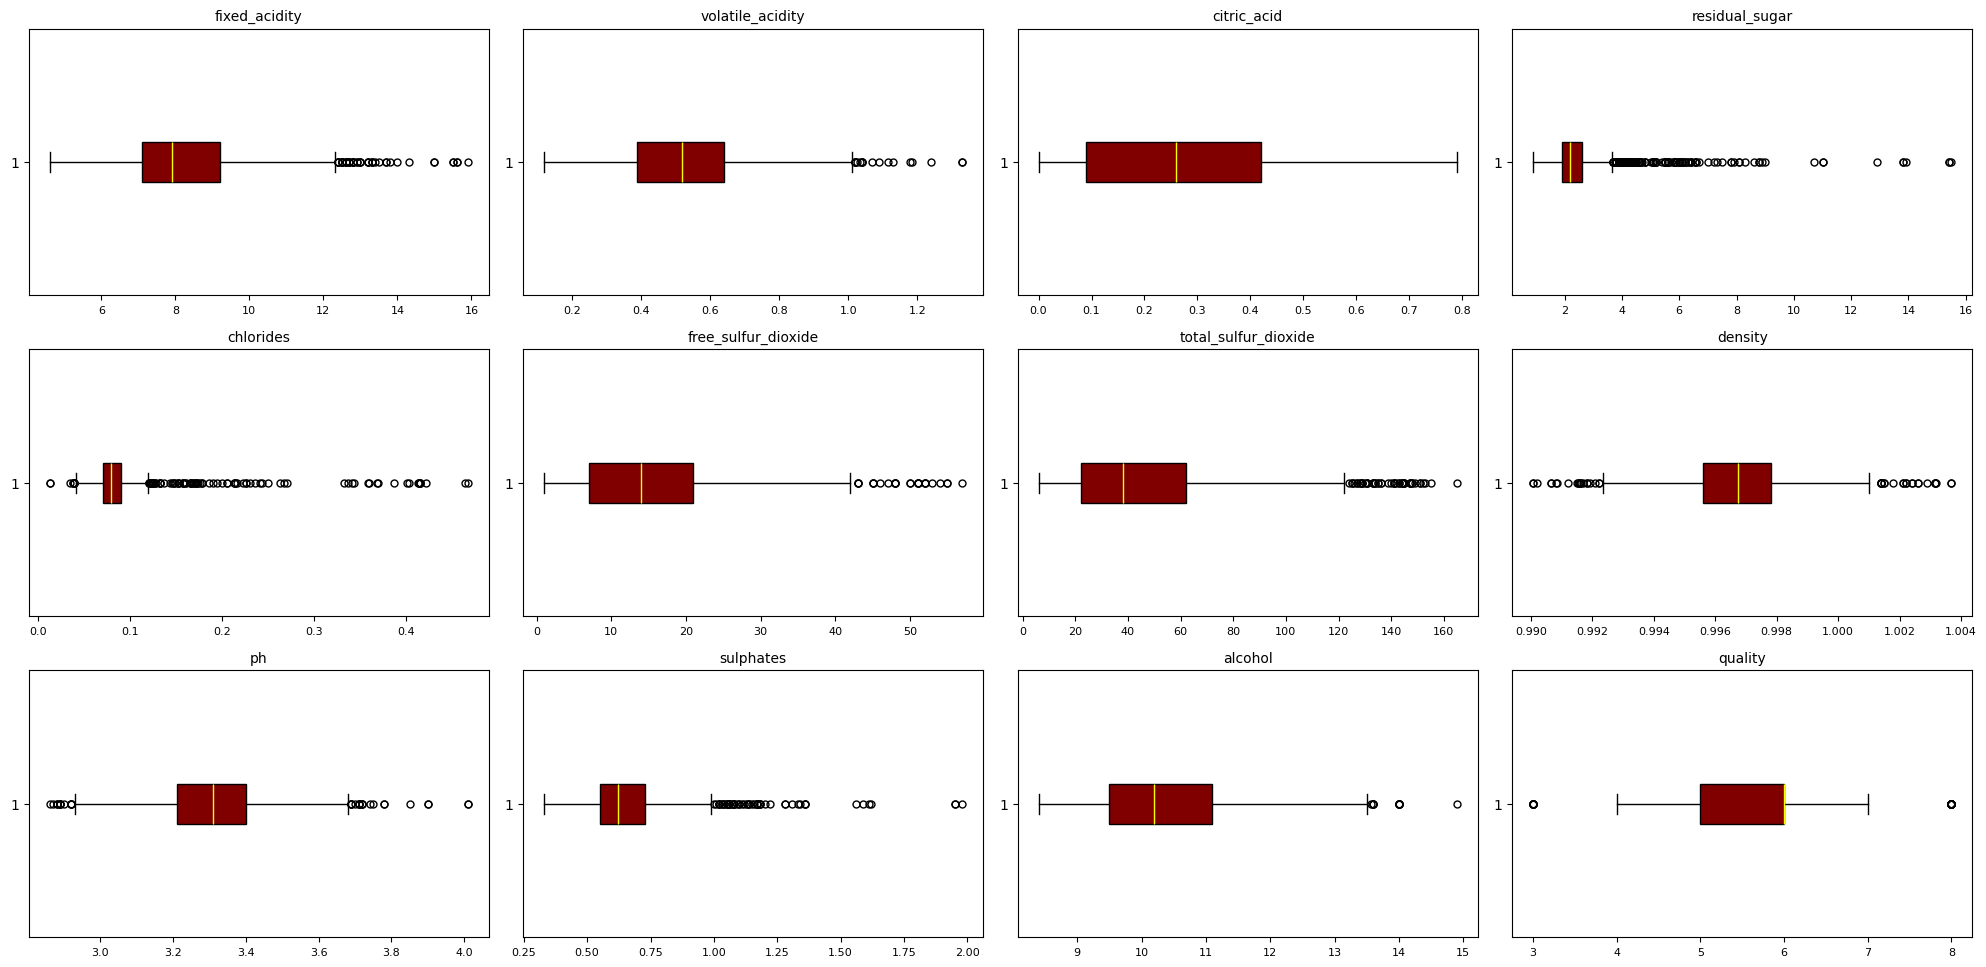

In [142]:
color = '#800000'


nrows, ncols = 5, 4 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(wine3.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(wine3.iloc[:, i].dropna(), vert=False, patch_artist=True, 
               boxprops=dict(facecolor=color, color='black'), 
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'), 
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(wine3.columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()

In [143]:
wine3.to_csv("wine3.csv", index=False)